In [1]:
import sys
sys.path
sys.path.append("../")
sys.path.append("../../")

# Feature Selection Comparison Notebook

## 1. Introduction

In this notebook, we will demonstrate how to use the `FeatureSelection` class from the `xai-compare` package to evaluate the ability of different explainers reduce the model complexity without sacrificing, and potentially even enhance its performance by eliminating the number of features. 

## 2. Process Overview

The process of evaluating consistency using the `Consistency` class involves several steps, as illustrated in the diagram below:

<img src="../docs/images/Feature_selection_wf.png" alt="Feature Selection Work Flow" style="width:900px;">



### Step-by-Step Explanation

1. **Initialization**:
   - The FeatureSelection class is initialized with the specified model, dataset, target values, and any configuration settings like the mode of operation (regression or classification), a random state for reproducibility, verbosity for debug outputs, and any custom or default explainers to be used.

2.	**Model Training**:
   - The model is trained on the training dataset to ensure it captures the underlying patterns before any feature elimination takes place.
	
3.	**Feature Importance Evaluation**:
   - Using the initialized explainers, the class evaluates the importance of each feature within the model. This step often involves generating explanations from each explainer for the given data, which highlights the contribution of each feature towards the model’s predictions.

4.	**Feature Elimination Process**:
   - Based on the obtained feature importance scores and the specified threshold, features deemed less important are progressively eliminated from the dataset. This process is iterative, where in each iteration, the least important feature (as determined by the explainer) is removed, and the model is retrained.

5.	**Model Retraining**:
   - After each feature elimination step, the model is retrained with the reduced feature set. 

6.	**Performance Evaluation**:
   -	The performance of the model is evaluated after each feature elimination step using the validation set. Metrics like accuracy, mean squared error, or any other relevant metric are calculated to monitor the performance.

7.	**Determination of Optimal Feature Set**:
	-	The process continues until the specified number of features in threshold is reached. 

8.	**Result Compilation**:
	-	Once the feature elimination process is complete, the results are compiled. This includes the final model’s performance metrics with the optimal feature set and a comparison of how the performance metrics evolved during the feature elimination process.

<h3>Description</h3>

## 3. Imports and Setup

First, we need to import the necessary libraries and the `FeatureSelection` class from the `xai-compare` package.

In [2]:
from sklearn.ensemble import RandomForestClassifier

from xai_compare.comparisons import FeatureSelection 
from xai_compare.config import MODE
from xai_compare.datasets import german_credit


## 4. Loading the Data

For this example, we will use the German Credit Score dataset provided by the `xai-compare` package.

In [3]:
data, target = german_credit()

## 5. Initializing the Model

We will use a Random Forest classifier for our model. You can use any other model as well.

In [4]:
model = RandomForestClassifier(max_depth=4, n_estimators=100, random_state=42)

## 6. Creating the FeatureSelection Object

Now, we will create an instance of the `FeatureSelection` class. We need to provide the model, data, and target labels. Additionally, we can specify other parameters like `mode`, `random_state`, `verbose`, `metric`, and `threshold`.

In [5]:
# define the model
model = RandomForestClassifier(max_depth=4, n_estimators=100, random_state=42)

# create the FeatureElimination class with german_credit() dataset
feat_selection = FeatureSelection(model, 
                                  data,
                                  target,
                                  mode=MODE.CLASSIFICATION, 
                                  random_state=4, 
                                  verbose=False)

## 7. Applying Feature Selection Algorithm and Displaying the Results

The `apply` method orchestrates the feature elimination process based on the importance scores derived from various explainers. It evaluates which features to retain or eliminate to optimize model performance without unnecessarily complicating the model. This method achieves this by iteratively calling internal methods that assess the impact of each feature on the model’s predictions, and progressively refines the feature set.

Once the feature elimination process is complete, the `display` method can be utilized to visualize the outcomes. This method provides a visual representation of how the feature importance and model performance metrics have evolved through the feature elimination process. It helps in understanding the effectiveness of the reduced feature set and displays the final metrics in a structured DataFrame format.


Explainers:   0%|          | 0/3 [00:00<?, ?it/s]

Explainers: 100%|██████████| 3/3 [01:08<00:00, 22.89s/it]


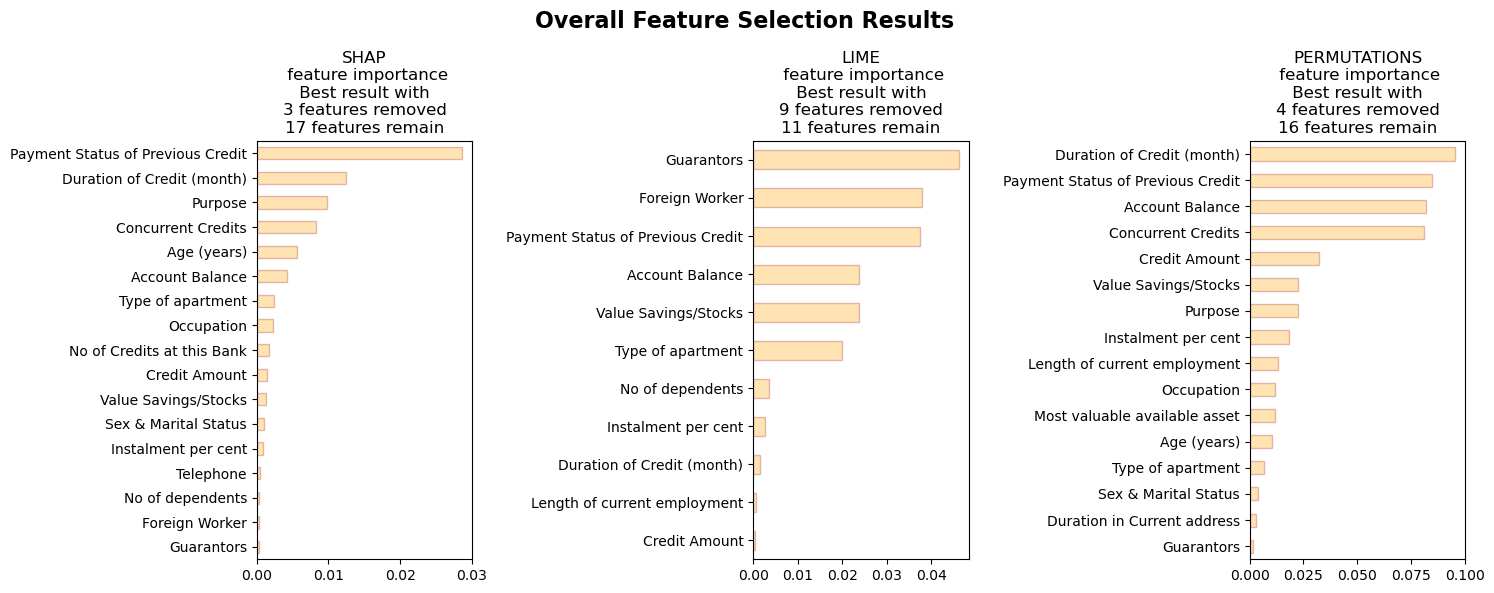

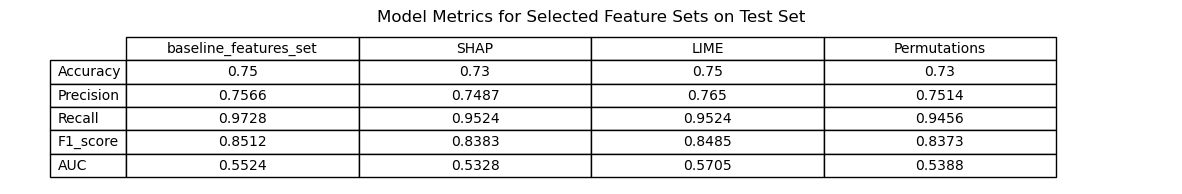

In [6]:
feat_selection.apply()
feat_selection.display()

## 8. Getting the Best Results

The `best_result` method can be invoked to retrieve the highest performance metrics achieved after the feature selection process. 

In [7]:
feat_selection.best_result()

Accuracy    0.75
dtype: float64